# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create two new dataframes
north_df = pd.read_csv("NorthCallCenter.csv")
south_df = pd.read_csv("SouthCallCenter.csv")


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [2]:
# Basic information to help me understand the datasets (1 of 4)

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [3]:
# Basic information to help me understand the datasets (2 of 4)

north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [4]:
# Basic information to help me understand the datasets (3 of 4)

south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [5]:
# Basic information to help me understand the datasets (4 of 4)

south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


#### EDA Question 1A:  How many reps are in the North branch?  

In [6]:
# EDA Question 1A Code Used:

north_df['Rep ID'].nunique() 

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [7]:
# EDA Question 1B Code Used:

south_df['Rep ID'].nunique() 

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [8]:
# EDA Question 2A Code Used:

north_average = north_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)

north_average

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [9]:
# EDA Question 2B Code Used:

south_average = south_df[['Busy Minutes', 'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time']].mean().round(2)

south_average

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [10]:
# EDA Question 3  Code Used:

TB_9 = (north_df.groupby('Time Block')['Calls'].count()['9:00 AM']) + (south_df.groupby('Time Block')['Calls'].count()['9:00 AM'])
TB_10 = (north_df.groupby('Time Block')['Calls'].count()['10:00 AM']) + (south_df.groupby('Time Block')['Calls'].count()['10:00 AM'])
TB_11 = (north_df.groupby('Time Block')['Calls'].count()['11:00 AM']) + (south_df.groupby('Time Block')['Calls'].count()['11:00 AM'])
TB_12 = (north_df.groupby('Time Block')['Calls'].count()['12:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['12:00 PM'])
TB_1 = (north_df.groupby('Time Block')['Calls'].count()['1:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['1:00 PM'])
TB_2 = (north_df.groupby('Time Block')['Calls'].count()['2:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['2:00 PM'])
TB_3 = (north_df.groupby('Time Block')['Calls'].count()['3:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['3:00 PM'])
TB_4 = (north_df.groupby('Time Block')['Calls'].count()['4:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['4:00 PM'])
TB_5 = (north_df.groupby('Time Block')['Calls'].count()['5:00 PM']) + (south_df.groupby('Time Block')['Calls'].count()['5:00 PM'])

print(TB_9)
print(TB_10)
print(TB_11)
print(TB_12)
print(TB_1)
print(TB_2)
print(TB_3)
print(TB_4)
print(TB_5)

10
99
56
120
40
65
73
53
43


##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91 
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.00
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

##### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> Your Answer: Yes, there is missing data. Both datasets are missing data in the Incoming Wait Time column, with the north_df missing 163 entries (about 66.53% of Incoming Wait Time data) and the south_df missing 188 entries (about 59.87% of Incoming Wait Time data). Data for this column applies to Incoming calls only and are not recorded for Outgoing calls, which explains the large proportion of missing data. I am leaving the column as-is because Incoming Wait Time is a KPI and these data are necessary when evaluating performance. 

In [11]:
# Cleaning Question 1 Code Used (1 of 5):
# This block of code provides basic information about north_df. I ran this to see how many entries the dataframe 
# has and how many non-null values are documented for each column. I was also interested in the variable types
# so I could determine what course of action to take for missing values.

north_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

In [12]:
# Cleaning Question 1 Code Used (2 of 5):
# After observing that 14 of 15 columns have complete data, I wanted to determine the exact percentage of data
# missing from the Incoming Wait Time column. 

percent_missing = north_df.isnull().sum() * 100 / len(north_df)

percent_missing

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [13]:
# Cleaning Question 1 Code Used (3 of 5):
# This block of code provides basic information about south_df. I ran this to see how many entries the dataframe 
# has and how many non-null values are documented for each column. I was also interested in the variable types
# so I could determine what course of action to take for missing values.

south_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             314 non-null    int64  
 1   Branch                 314 non-null    object 
 2   Call Purpose           314 non-null    object 
 3   Time Block             314 non-null    object 
 4   Incoming or Outgoing   314 non-null    object 
 5   Queue                  314 non-null    object 
 6   Rep ID                 314 non-null    object 
 7   Sale                   314 non-null    object 
 8   Lost Call              314 non-null    int64  
 9   Abandoned              314 non-null    int64  
 10  Busy Minutes           314 non-null    int64  
 11  Not Ready Minutes      314 non-null    int64  
 12  Incoming Wait Time     126 non-null    float64
 13  During Call Wait Time  314 non-null    int64  
 14  Calls                  314 non-null    int64  
dtypes: flo

In [14]:
# Cleaning Question 1 Code Used (4 of 5)
# After observing that 14 of 15 columns have complete data, I wanted to determine the exact percentage of data
# missing from the Incoming Wait Time column. 

percent_missing = south_df.isnull().sum() * 100 / len(south_df)

percent_missing

Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       59.872611
During Call Wait Time     0.000000
Calls                     0.000000
dtype: float64

In [15]:
# Cleaning Question 1 Code Used (5 of 5)
# This block of code tells me the average Incoming Wait Time for the North and South Call Centers. I wanted to
# determine how significant the wait time may have been.  

north_wait_avg = north_df['Incoming Wait Time'].dropna().mean()
south_wait_avg = south_df['Incoming Wait Time'].dropna().mean()

print(north_wait_avg)
print(south_wait_avg)

3.048780487804878
3.0


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> Your Answer: I rectified this issue by replacing the one "YES " value (YES with a space after it) with "YES". I did this to make sure the data are consistent. 

In [16]:
# Cleaning Question 2 Code Used (1 of 3):
# I used value_counts to determine what values were included in the Sale column and the count of each value.

north_df['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [17]:
# Cleaning Question 2 Code Used (2 of 3):
# I used .replace to convert the 'YES ' (YES with a space after it) to 'YES' (YES without a space).

north_df['Sale'] = north_df['Sale'].replace({'YES':'YES', 'YES ':'YES'})

In [18]:
# Cleaning Question 2 Code Used (3 of 3):
# I used value_counts again to make sure the above code worked correctly. 

north_df['Sale'].value_counts()

NO     234
YES     11
Name: Sale, dtype: int64

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> Your Answer: There are 2 duplicates in north_df and 3 duplicates in south_df. I am dropping the duplicates from each dataset. 

In [19]:
# Cleaning Question 3 Code Used (1 of 10):
# 'Unnamed: 0' appears to be a unique identifier / redundant index. Use .nunique() to 
# determine if this is a unique identifier in north_df.

north_df['Unnamed: 0'].nunique()

# It is a unique identifier. 

245

In [20]:
# Cleaning Question 3 Code Used (2 of 10):
# Looking at the duplicate rows

north_df_drop_Unnamed = north_df.drop('Unnamed: 0', axis=1)
north_df_drop_Unnamed = north_df_drop_Unnamed[north_df_drop_Unnamed.duplicated()]

print(north_df_drop_Unnamed)

    Branch   Call Purpose Time Block Incoming or Outgoing Queue  Rep ID Sale  \
50   North  Sales Support   12:00 PM             Incoming     A     Joe   NO   
105  North  Sales Support   10:00 AM             Outgoing     A  Amanda   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
50           0          0            10                  1   
105          0          0            11                  2   

     Incoming Wait Time  During Call Wait Time  Calls  
50                  4.0                      3      1  
105                 NaN                      2      1  


In [21]:
# Cleaning Question 3 Code Used (3 of 10):
# 'Unnamed: 0" is a unique identifier. Second check to determine if there are duplicates 
# in north_df when dropping 'Unnamed: 0'

north_df_deduped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()

print(north_df.shape)
print(north_df_deduped.shape)

# When dropping 'Unnamed: 0' it appears there are 2 duplicate rows.

(245, 15)
(243, 14)


In [22]:
# Cleaning Question 3 Code Used (4 of 10):
# Drop the unique identifier column 'Unnamed: 0' from north_df. 
# Check the column titles to make sure it was dropped correctly.

north_df = north_df.drop(columns = ['Unnamed: 0'])

north_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [23]:
# Cleaning Question 3 Code Used (5 of 10):
# Now that I have dropped the unnecessary column 'Unnamed: 0' I am dropping the duplicate 
# rows and re-checking the shape.

north_df = north_df.drop_duplicates()

north_df.shape

(243, 14)

In [24]:
# Cleaning Question 3 Code Used (6 of 10):
# Completing the same steps for south_df. CHecking to see if Unnamed: 0 is unique identifier.

south_df['Unnamed: 0'].nunique()

314

In [25]:
# Cleaning Question 3 Code Used (7 of 10):
# Checking the duplicate rows

south_df2 = south_df.drop('Unnamed: 0', axis=1)
south_df2 = south_df2[south_df2.duplicated()]

print(south_df2)

    Branch   Call Purpose Time Block Incoming or Outgoing Queue Rep ID Sale  \
58   South  Sales Support   12:00 PM             Incoming     D   Kate   NO   
170  South  Sales Support   11:00 AM             Outgoing     D  Randy   NO   
180  South  Sales Support   12:00 PM             Outgoing     C  Sandy   NO   

     Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
58           0          0             8                  1   
170          0          0             8                  3   
180          0          0             8                  1   

     Incoming Wait Time  During Call Wait Time  Calls  
58                  3.0                      3      1  
170                 NaN                      2      1  
180                 NaN                      4      1  


In [26]:
# Cleaning Question 3 Code Used (8 of 10):

south_df_dedupped = south_df.drop('Unnamed: 0', axis=1).drop_duplicates()

print(south_df.shape)
print(south_df_dedupped.shape)

# When dropping 'Unnamed: 0' it appears there are 3 duplicate rows.

(314, 15)
(311, 14)


In [27]:
# Cleaning Question 3 Code Used (9 of 10):
# Drop the unique identifier column 'Unnamed: 0' from south_df. 
# Check the column titles to make sure it was dropped correctly.

south_df = south_df.drop(columns = ['Unnamed: 0'])

south_df.columns

Index(['Branch', 'Call Purpose', 'Time Block', 'Incoming or Outgoing', 'Queue',
       'Rep ID', 'Sale', 'Lost Call', 'Abandoned', 'Busy Minutes',
       'Not Ready Minutes', 'Incoming Wait Time', 'During Call Wait Time',
       'Calls'],
      dtype='object')

In [28]:
# Cleaning Question 3 Code Used (10 of 10):
# Now that I have dropped the unnecessary column 'Unnamed: 0' I am dropping the duplicate rows and re-checking
# the shape.

south_df = south_df.drop_duplicates()

south_df.shape

(311, 14)

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> Your Answer: Unnecessary data could be duplicated data, repetitive data, or irrelevant/uninformative data. 

> I already deleted the duplicate data from the data sets.

> To determine if there are repetitive data in the datasets I ran a for loop to identify the value counts of columns in which >95% of the data were repetitive. The North and South datasets have a Branch column that has 100% of the same data ('North' or 'South', respectively). Even though the information is redundant within the dataset, I am keeping the Branch column because I will ahve to concatenate the data later and will need this information within the company-wide dataset. The for loop identified that the Call column is also repetitive (i.e., every value == 1). However, I am not dropping this column as later analysis requires it.

> Finally, the column 'Unnamed: 0' appears to be a unique identifier. Earlier I determined the number of unique values within each 'Unnamed: 0' column and determined there are 245 and 314 unique values for the North and South Call Center datasets, respectively. Because this column is redundant with the index, I dropped it. 

In [29]:
# Cleaning Question 4 Code Used (1 of 2):
# To determine repetitive data in north_df:

num_rows = len(north_df.index)
low_information_cols = [] #

for col in north_df.columns:
    cnts = north_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
North    243
Name: Branch, dtype: int64

Sale: 95.47325%
NO     232
YES     11
Name: Sale, dtype: int64

Lost Call: 97.94239%
0    238
1      5
Name: Lost Call, dtype: int64

Abandoned: 97.11934%
0    236
1      7
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    243
Name: Calls, dtype: int64



In [30]:
# Cleaning Question 4 Code Used (2 of 2):
# To determine repetitive data in south_df:

num_rows = len(south_df.index)
low_information_cols = [] #

for col in south_df.columns:
    cnts = south_df[col].value_counts(dropna=False)
    top_pct = (cnts/num_rows).iloc[0]
    
    if top_pct > 0.95:
        low_information_cols.append(col)
        print('{0}: {1:.5f}%'.format(col, top_pct*100))
        print(cnts)
        print()

Branch: 100.00000%
South    311
Name: Branch, dtype: int64

Sale: 98.07074%
NO     305
YES      6
Name: Sale, dtype: int64

Lost Call: 96.46302%
0    300
1     11
Name: Lost Call, dtype: int64

Abandoned: 98.71383%
0    307
1      4
Name: Abandoned, dtype: int64

Calls: 100.00000%
1    311
Name: Calls, dtype: int64



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [31]:
# Create dataframe for the entire company named df.
# Check the shape to make sure it concatenated correctly.

df = pd.concat([north_df, south_df])

df.shape

(554, 14)

#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the highest number of calls and their total calls:
- North Branch = Brent (37 calls)
- South Branch = Eric (35 calls)


In [32]:
# Manipulation Question 1 Code Used:
# First I group by Branch and Rep ID, then I sum the groups to determine the number of calls for each rep at
# each branch. Then I sort by Branch and Calls to determine the rep with the highest number of calls at each 
# branch.

df.groupby(['Branch', 'Rep ID']).sum().sort_values(by = ['Branch','Calls'], ascending=False)

/var/folders/cv/mdwq80xn6p9c63w11qqrqsqw0000gn/T/ipykernel_13415/3209720920.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby(['Branch', 'Rep ID']).sum().sort_values(by = ['Branch','Calls'], ascending=False)


Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
Branch Rep ID                                                          
South  Eric            0          0           361                 54   
       Randy           3          1           312                 63   
       Helga           0          2           292                 58   
       Sandy           1          0           317                 59   
       George          0          0           298                 53   
       Karl            1          0           287                 61   
       Kate            0          0           283                 60   
       Josh            3          0           260                 50   
       Susan           2          0           267                 53   
       Sharon          1          1           257                 38   
       Alice           0          0           199                 46   
North  Brent           0          1           362                 71   
       Lilly           0          2           307                 59   
       Duke            2          0           292                 56   
       Todd            1          0           296                 58   
       Joe             0          0           246                 48   
       Cam             1          0           233                 46   
       Xander          1          0           244                 44   
       Andy            0          3           228                 43   
       Amanda          0          1           218                 41   

               Incoming Wait Time  During Call Wait Time  Calls  
Branch Rep ID                                                    
South  Eric                  47.0                    112     35  
       Randy                 47.0                     96     32  
       Helga                 36.0                     95     31  
       Sandy                 34.0                     96     31  
       George                41.0                     87     29  
       Karl                  26.0                     85     28  
       Kate                  34.0                     80     28  
       Josh                  31.0                     83     26  
       Susan                 35.0                     88     26  
       Sharon                29.0                     77     25  
       Alice                 15.0                     58     20  
North  Brent                 17.0                    117     37  
       Lilly                 37.0                     88     30  
       Duke                  39.0                     85     29  
       Todd                  21.0                     97     29  
       Joe                   32.0                     78     25  
       Cam                   32.0                     66     24  
       Xander                20.0                     68     24  
       Andy                  36.0                     65     23  
       Amanda                12.0                     58     22

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.88%
- South Branch = 1.29%
- Company Wide = 1.99%
- Do any of these fall out of the optimal range of 2-5%? The South Branch's average Call Abandonment Rate of 1.27% is lower than the optimal range indicating they have exceptional performance when measured with this KPI. The overall company percentage is also slightly below the range, indicating exceptional performance overall. 

In [35]:
# Manipulation Question 2 Code Used:

North_Abandoned = (north_df['Abandoned'].agg('mean') * 100).round(2)

South_Abandoned = (south_df['Abandoned'].agg('mean') * 100).round(2)

Company_Abandoned = (df['Abandoned'].agg('mean') * 100).round(2)

print(North_Abandoned)
print(South_Abandoned)
print(Company_Abandoned)

2.88
1.29
1.99


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.74% calls answered within 2 seconds. 33 calls answered within 2 seconds, 48 calls answered after more than 2 seconds.
- South Branch = 38.40% calls answered within 2 seconds. 48 calls answered within 2 seconds, 77 calls answered after more than 2 seconds.
- Company Wide = 39.32% calls answered within 2 seconds. 81 calls answered within 2 seconds, 125 calls answered after more than 2 seconds. 

In [36]:
# Manipulation Question 3 Code Used (1 of 4):
# Determine the maximum value for Incoming Wait Time, which I will use in the below for loop. 

df["Incoming Wait Time"].max()

5.0

In [37]:
# Manipulation Question 3 Code Used (2 of 4):
# I used a for loop to determine if the Incoming Wait Time met the KPI (<= 2 seconds) or did not meet the KPI. 
# I created a new column in which I appended the result as meeting (1) or not meeting (0) the KPI.

Service_Level_KPI = []

for Time in df["Incoming Wait Time"]:
    if Time <= 2:
        Service_Level_KPI.append(1)
    elif Time > 2 and Time < 6:
        Service_Level_KPI.append(0)       
    else:
        Service_Level_KPI.append(Time)       

df["Service Level KPI"] = Service_Level_KPI  

In [38]:
# Manipulation Question 3 Code Used (3 of 4):
# Determine number of calls that met the KPI and number of calls that did not meet the KPI at the company level.
# Determine percentage of calls that met the KPI and number of calls that did not meet the KPI at the company 
# level, rounded to the nearest hundreth.

Company_KPI_Num = df['Service Level KPI'].value_counts()
Company_KPI_Perc = (df['Service Level KPI'].mean() * 100).round(2)

print(Company_KPI_Num)
print(Company_KPI_Perc)

0.0    125
1.0     81
Name: Service Level KPI, dtype: int64
39.32


In [39]:
# Manipulation Question 3 Code Used (4 of 4):
# Determine number of calls that met the KPI and number of calls that did not meet the KPI at the branch level.
# Determine percentage of calls that met the KPI and number of calls that did not meet the KPI at the branch 
# level, rounded to the nearest hundreth.

Branch_Group = df.groupby('Branch')

Branch_KPI_Num = Branch_Group['Service Level KPI'].value_counts()
Branch_KPI_Perc = (Branch_Group['Service Level KPI'].mean() * 100).round(2)

print(Branch_KPI_Num)
print(Branch_KPI_Perc)

Branch  Service Level KPI
North   0.0                  48
        1.0                  33
South   0.0                  77
        1.0                  48
Name: Service Level KPI, dtype: int64
Branch
North    40.74
South    38.40
Name: Service Level KPI, dtype: float64


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 712.67 seconds
- South Branch in seconds = 721.08 seconds
- Company Wide in seconds = 717.77 seconds

Average speed of answer (rounded to nearest hundredth)(Incoming Wait Time only):
- North Branch in seconds = 3.04 seconds
- South Branch in seconds = 3.00 seconds
- Company Wide in seconds = 3.01 seconds

In [40]:
# Manipulation Question 4 Code Used:
# This code defines answer speed as busy minutes + not ready minutes + incoming wait time.

df['Answer Speed'] = (df['Busy Minutes']*60) + (df['Not Ready Minutes']*60) + (df['Incoming Wait Time'])

Company_Speed = df['Answer Speed'].mean().round(2)

Branch_Speed = Branch_Group['Answer Speed'].mean().round(2)

print(Company_Speed)
print(Branch_Speed)

717.77
Branch
North    712.67
South    721.08
Name: Answer Speed, dtype: float64


In [41]:
# Manipulation Question 4 Code Used:
# This code defines answer speed as incoming wait time only.

north_wait_avg = north_df['Incoming Wait Time'].mean().round(2)
south_wait_avg = south_df['Incoming Wait Time'].mean().round(2)
company_wait_avg = df['Incoming Wait Time'].mean().round(2)

print(north_wait_avg)
print(south_wait_avg)
print(company_wait_avg)

3.04
3.0
3.01


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose a bar chart because we are displaying a measurement (average abandonment rate) of categorical data (queue).

In [42]:
# Import any additional libraries needed with alias

import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from matplotlib import style
# setting style for graphs

style.use('ggplot')
plt.rcParams['figure.figsize'] = (20,10)

/var/folders/cv/mdwq80xn6p9c63w11qqrqsqw0000gn/T/ipykernel_13415/3742215539.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


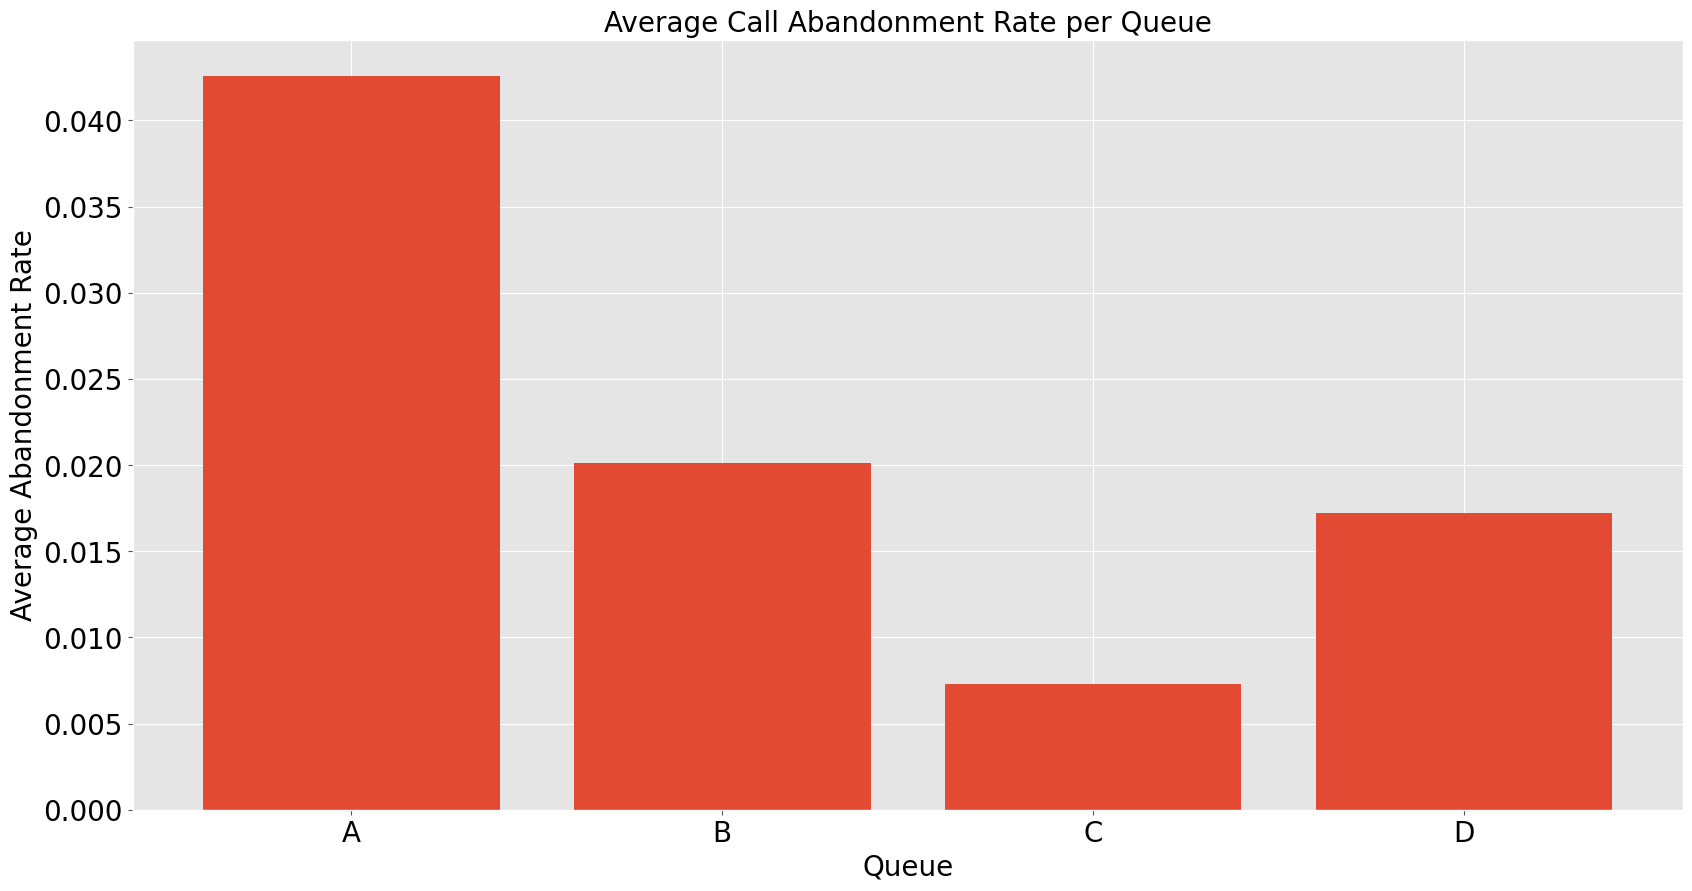

In [75]:
# Create visualization 1 here
# DECIMALS

# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), values, tick_label=names) 

plt.title('Average Call Abandonment Rate per Queue',color = 'black', size = 20)
plt.xticks(color = 'black', size = 20)
plt.yticks(color = 'black', size = 20)
plt.xlabel('Queue',color = 'black', size = 20)
plt.ylabel('Average Abandonment Rate',color = 'black', size = 20)
plt.savefig('abandonment_bar_vertical.png')

plt.show()

/var/folders/cv/mdwq80xn6p9c63w11qqrqsqw0000gn/T/ipykernel_13415/1476690792.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


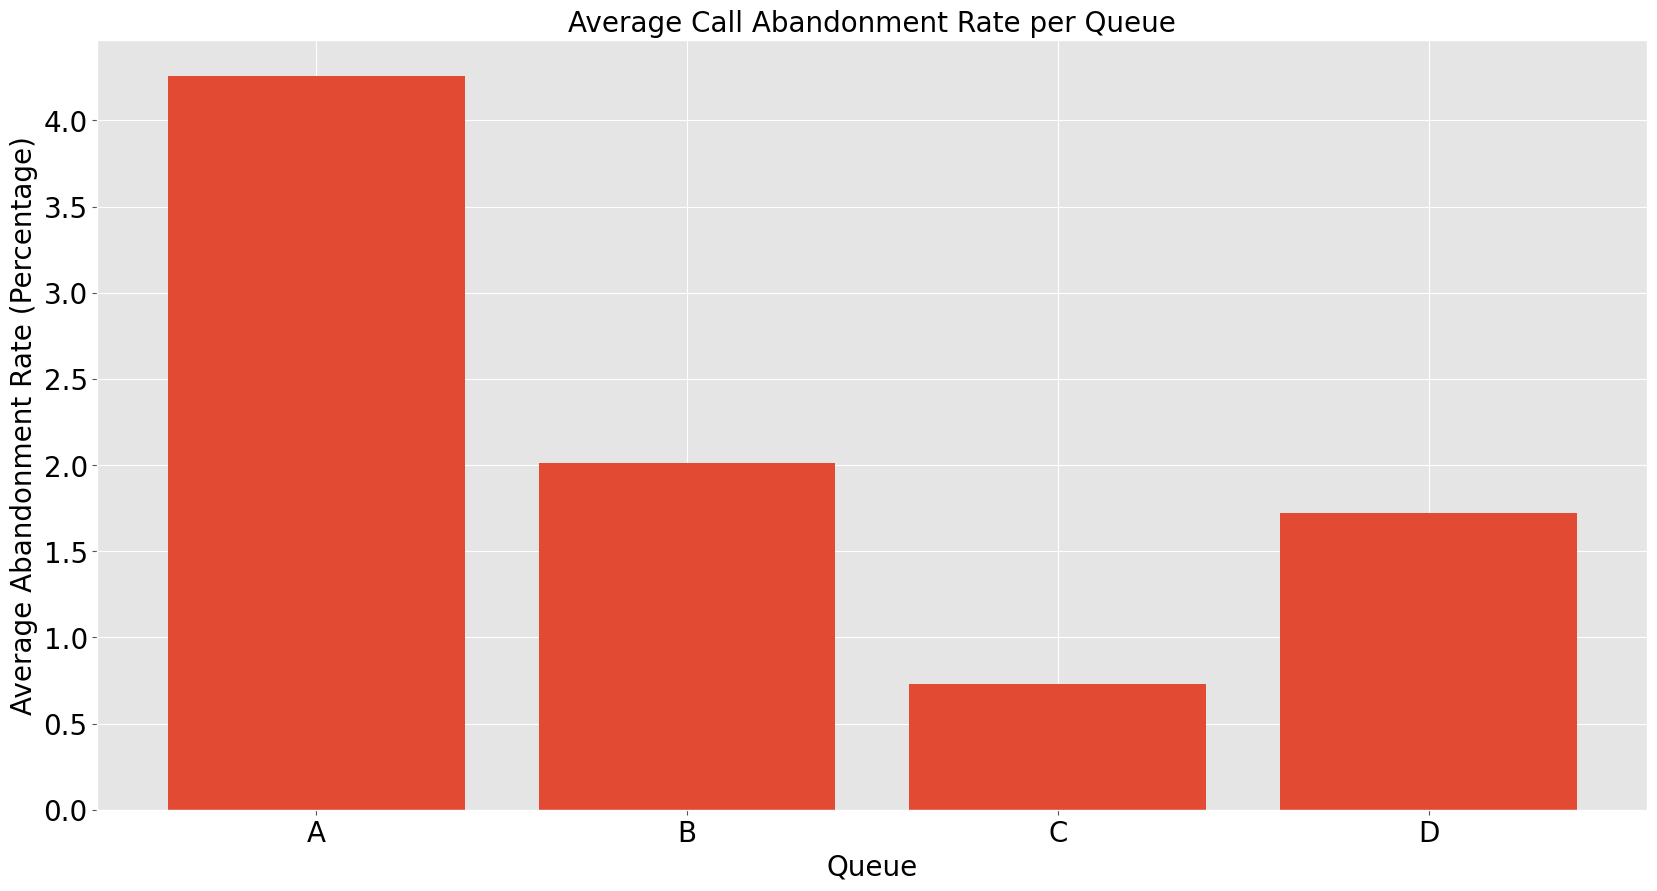

In [74]:
# Create visualization 1 here
# PERCENTAGES

# The dictionary abandonment_rates has the data you need.

abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = (queue_dict["Abandoned"][i] / queue_dict["Calls"][i]) * 100

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

plt.bar(range(len(abandonment_rates)), values, tick_label=names) 

plt.title('Average Call Abandonment Rate per Queue',color = 'black', size = 20)
plt.xticks(color = 'black', size = 20)
plt.yticks(color = 'black', size = 20)
plt.xlabel('Queue',color = 'black', size = 20)
plt.ylabel('Average Abandonment Rate (Percentage)',color = 'black', size = 20)
plt.savefig('abandonment_bar_vertical.png')

plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar charts because we are displaying a measurement (service level percentage / average answer speed) of categorical data (representatives).

In [44]:
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

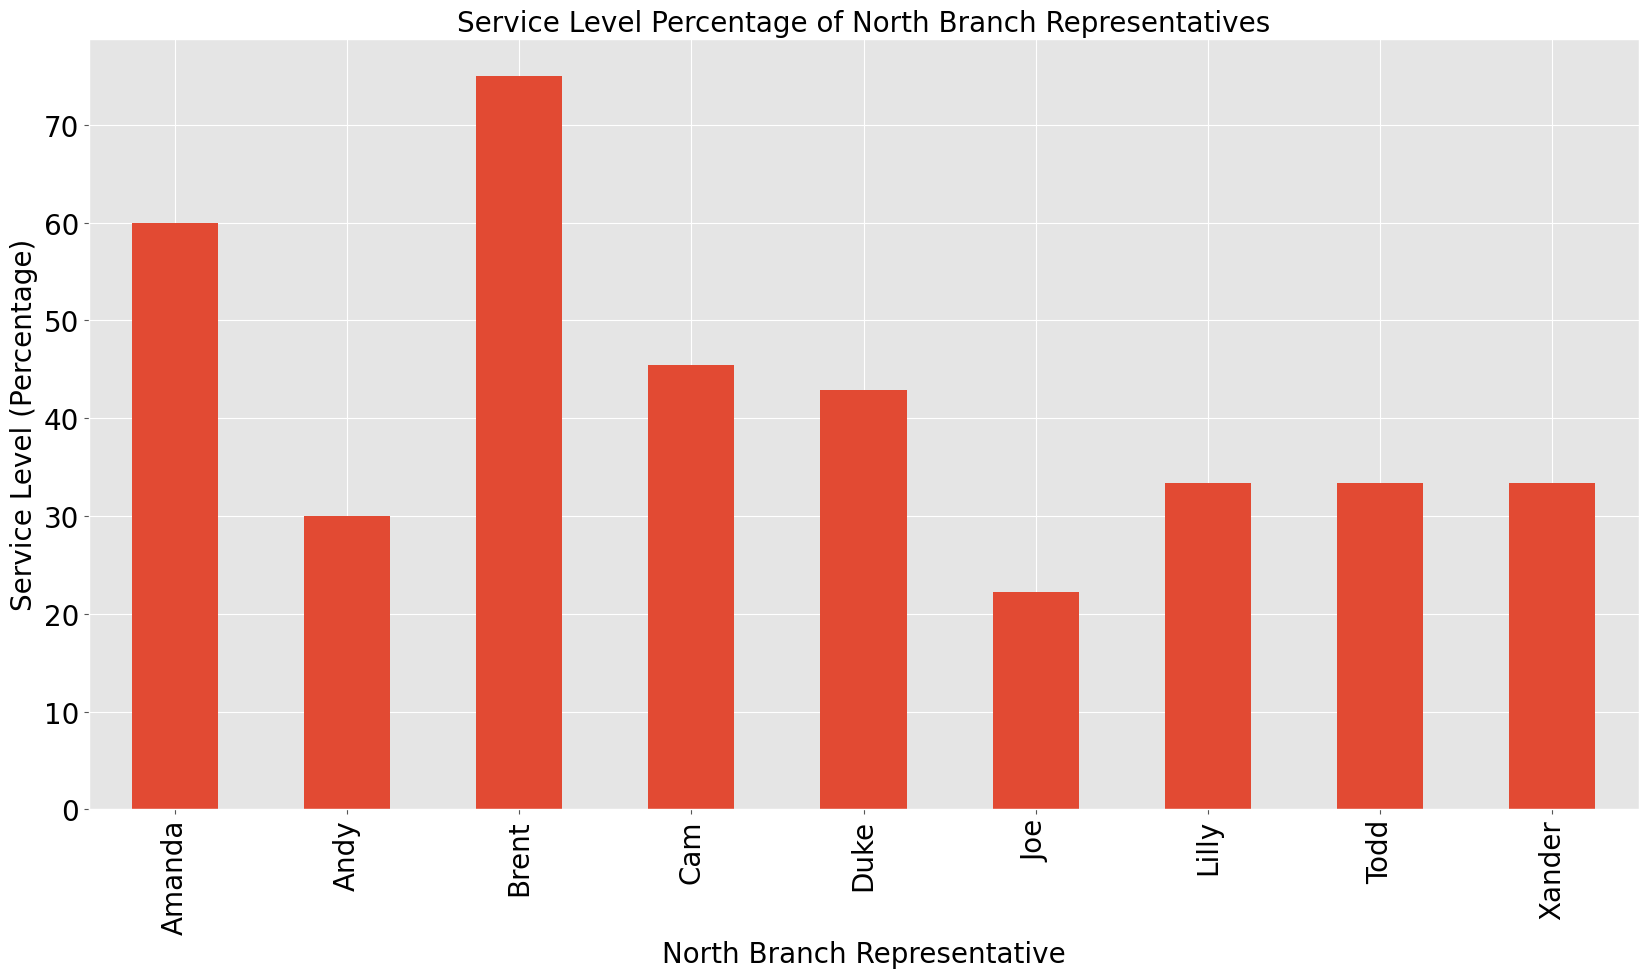

In [76]:
# Create visualization 2 here (Service Level Percentage)
# Your Code Here:

style.use('ggplot')

service_level["Service Level %"].plot(kind = 'bar', legend = False)

plt.title("Service Level Percentage of North Branch Representatives",color = 'black', size = 20)
plt.xticks(color = 'black', size = 20)
plt.yticks(color = 'black', size = 20)
plt.xlabel('North Branch Representative',color = 'black', size = 20)
plt.ylabel('Service Level (Percentage)',color = 'black', size = 20)
plt.savefig('North_Rep_Service Level Percentage.png')

plt.show()

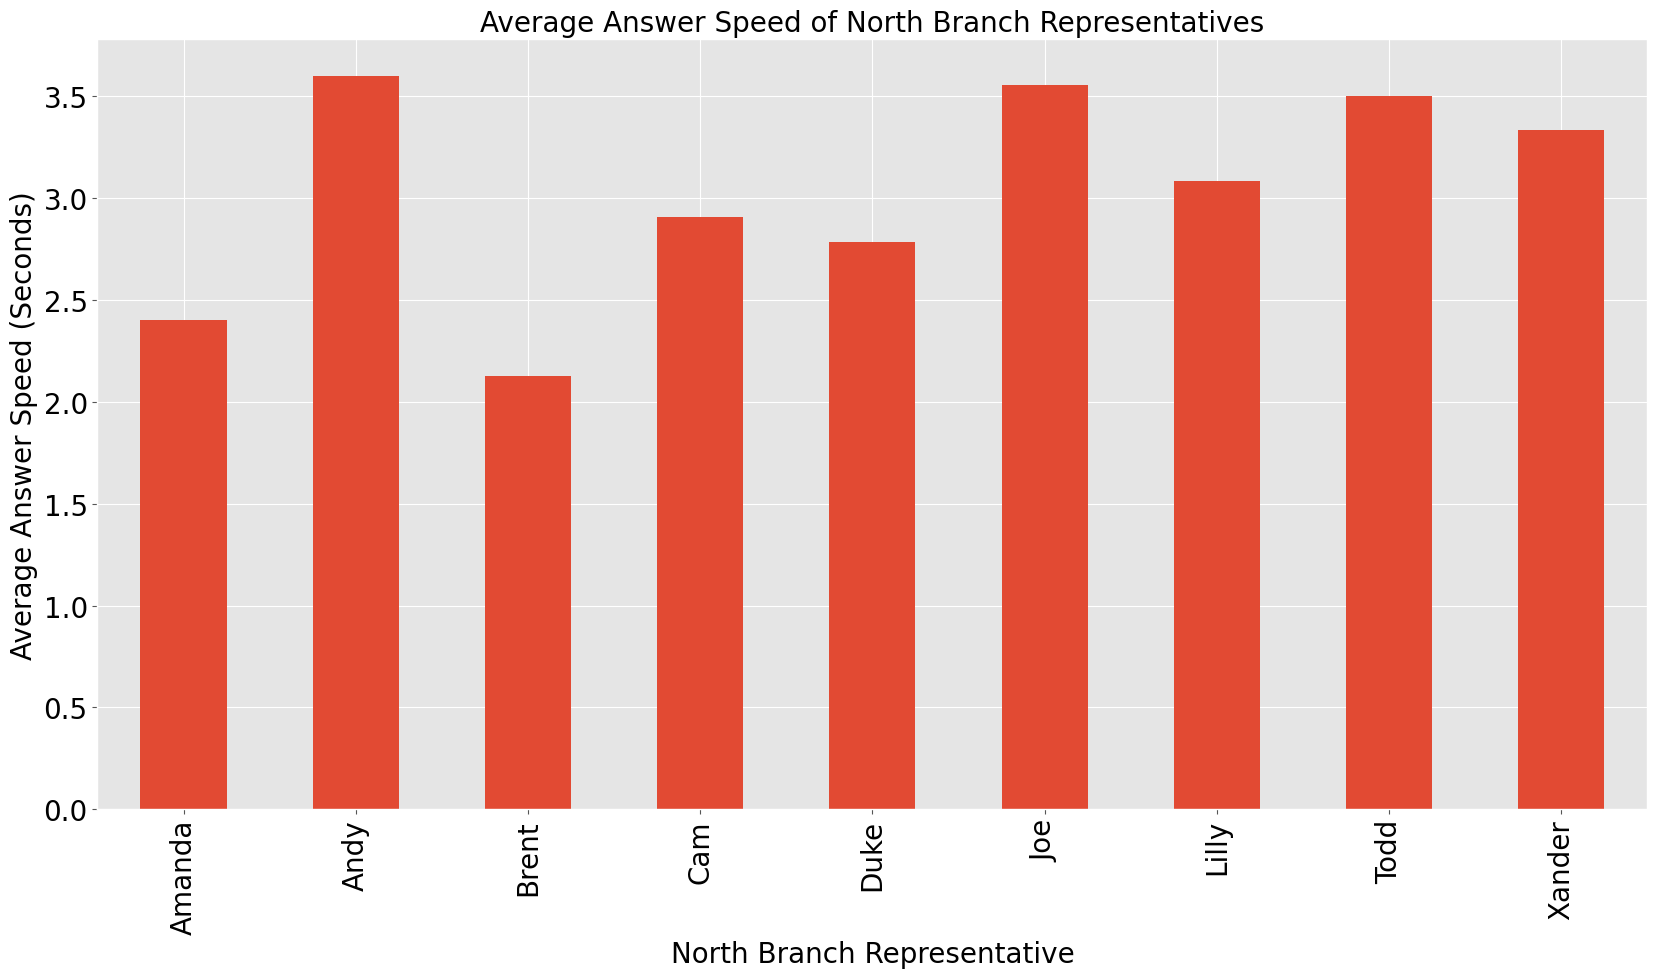

In [77]:
# Create visualization 2 here (Average Answer Speed)
# Your Code Here:

style.use('ggplot')

north_plt.plot(x = 'Rep ID', y = 'Incoming Wait Time', kind = 'bar', legend = False)

plt.title("Average Answer Speed of North Branch Representatives",color = 'black', size = 20)
plt.xticks(color = 'black', size = 20)
plt.yticks(color = 'black', size = 20)
plt.xlabel('North Branch Representative',color = 'black', size = 20)
plt.ylabel('Average Answer Speed (Seconds)',color = 'black', size = 20)
plt.savefig('North_Rep_Average_Answer_Speed.png')

plt.show()

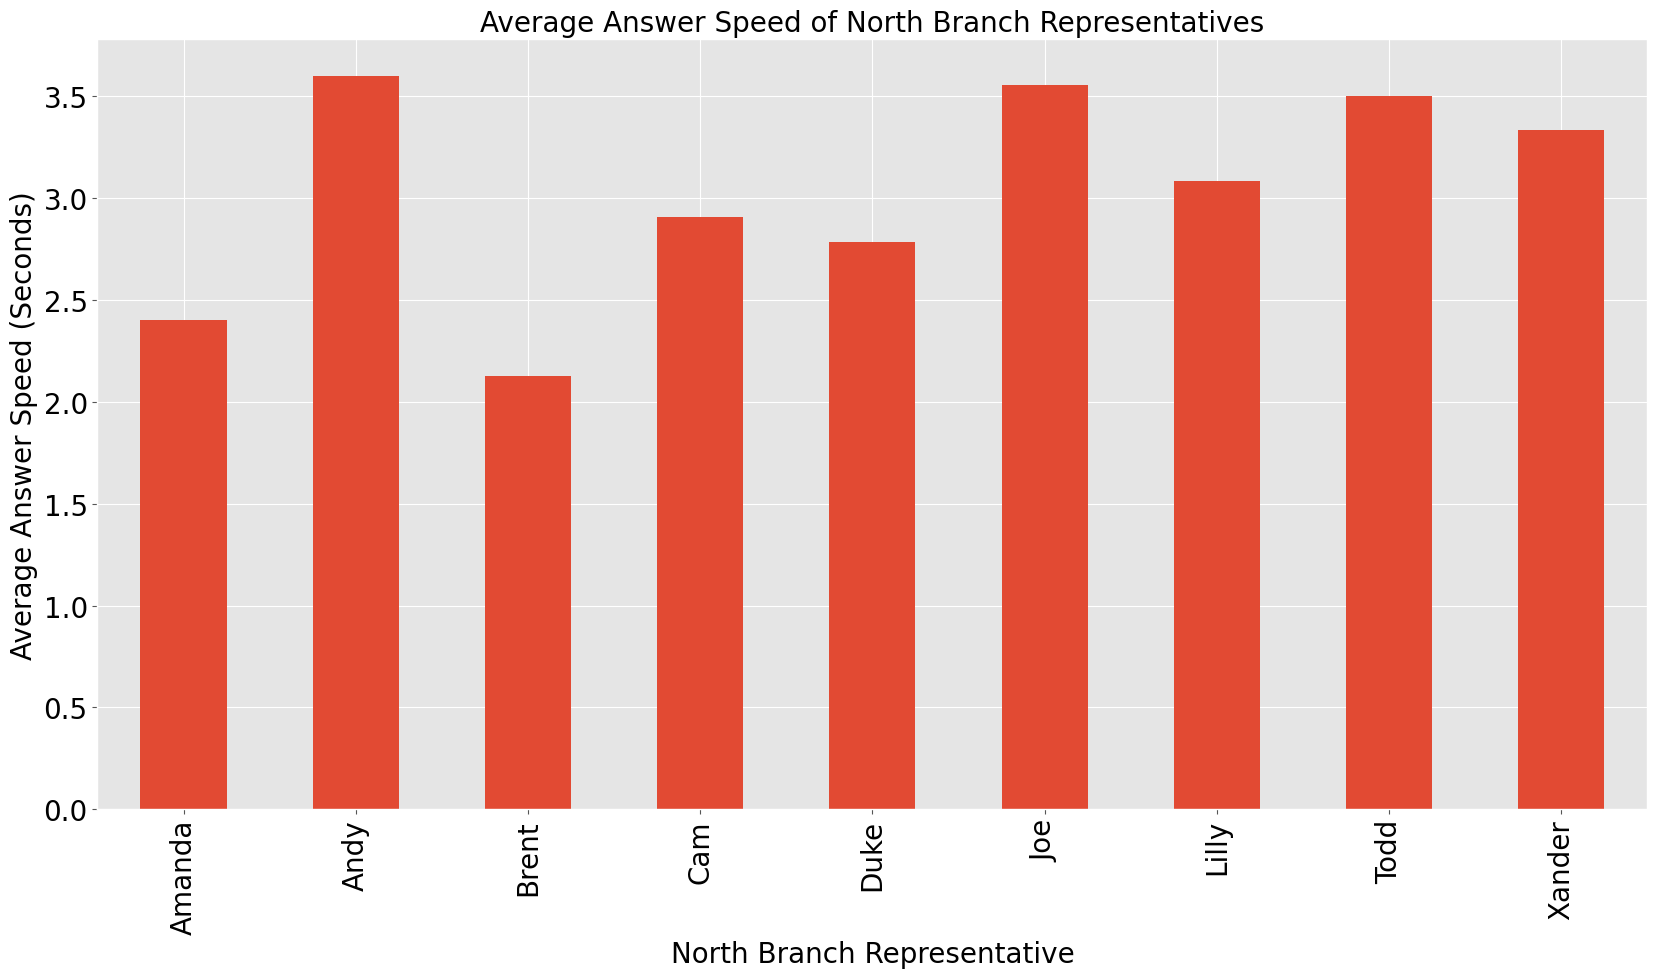

In [78]:
# Create visualization 2 here (Average Answer Speed)
# Your Code Here:

style.use('ggplot')

north_plt.plot(x = 'Rep ID', y = 'Incoming Wait Time', kind = 'bar', legend = False)

plt.title("Average Answer Speed of North Branch Representatives",color = 'black', size = 20)
plt.xticks(color = 'black', size = 20)
plt.yticks(color = 'black', size = 20)
plt.xlabel('North Branch Representative',color = 'black', size = 20)
plt.ylabel('Average Answer Speed (Seconds)',color = 'black', size = 20)
plt.savefig('North_Rep_Average_Answer_Speed.png')

plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose pie charts for each of the call purposes because pie charts show a static number and how categories represent part of a whole. Pie charts seemed appropriate in this case because I needed to show a single part to whole relationship / two categories (incoming and outgoing calls). 

In [47]:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                120
                 Incoming                 73
Name: Incoming or Outgoing, dtype: int64


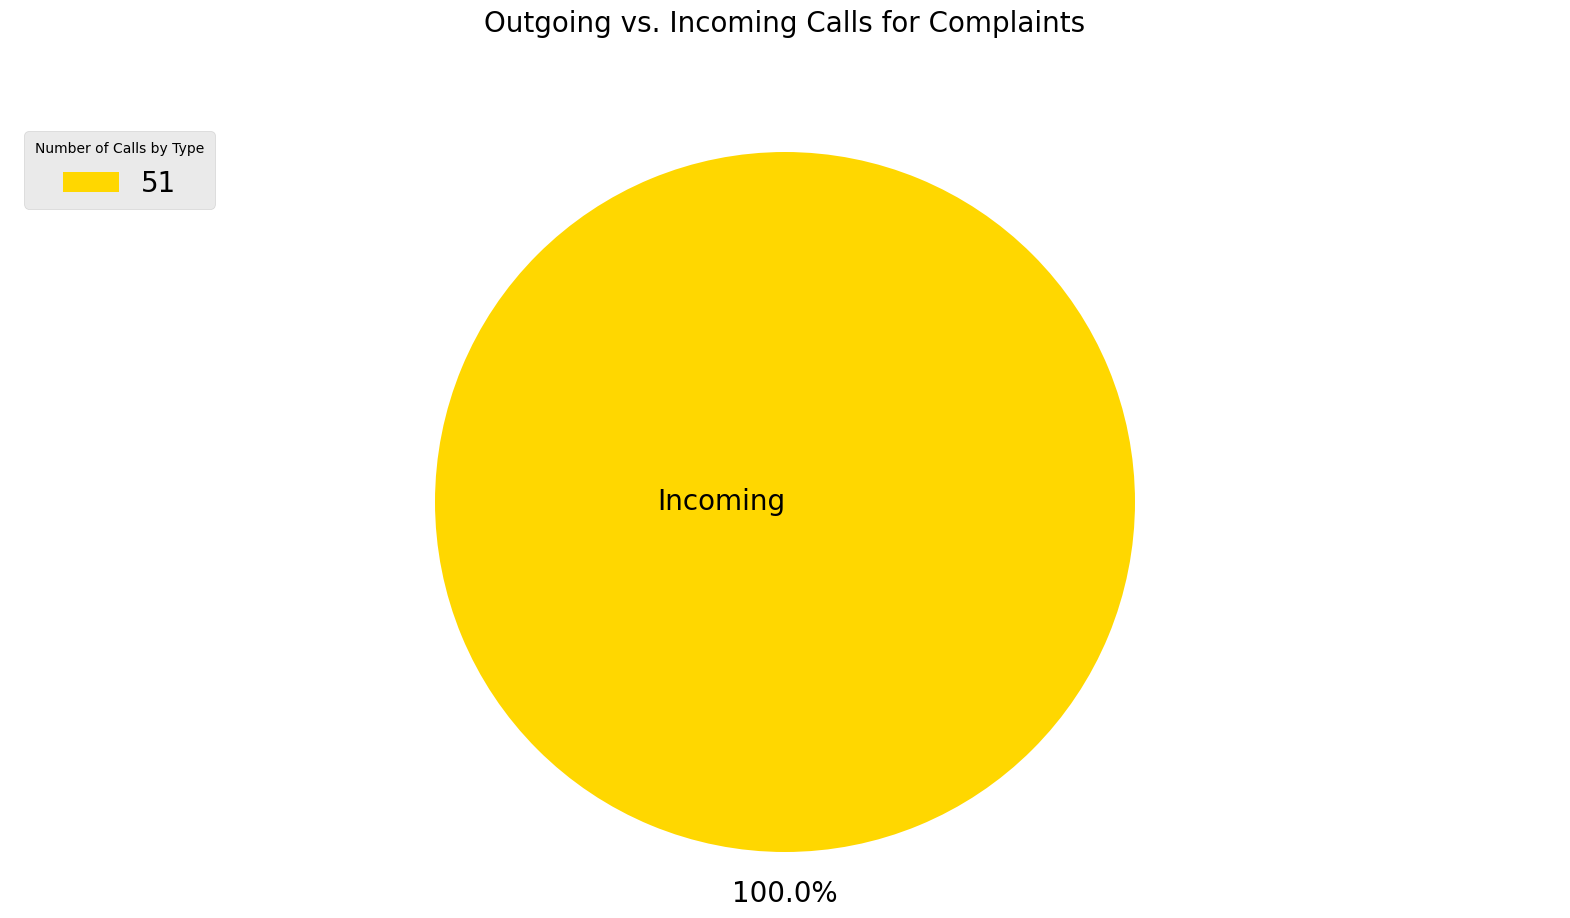

In [48]:
colors = ['gold', 'red']
labels = ["Incoming"]
labels = list(labels)

plt.pie(complaints.values(), labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12, labeldistance = 0.0, shadow = False, textprops={'fontsize': 20})
plt.title('Outgoing vs. Incoming Calls for Complaints', color = 'black', y = 1.1, fontsize = 20)
plt.axis('equal')
plt.savefig('Complaint_pie.png')
plt.legend(purpose_counts, loc = 'upper left', fontsize = 20, title = "Number of Calls by Type")

plt.show()

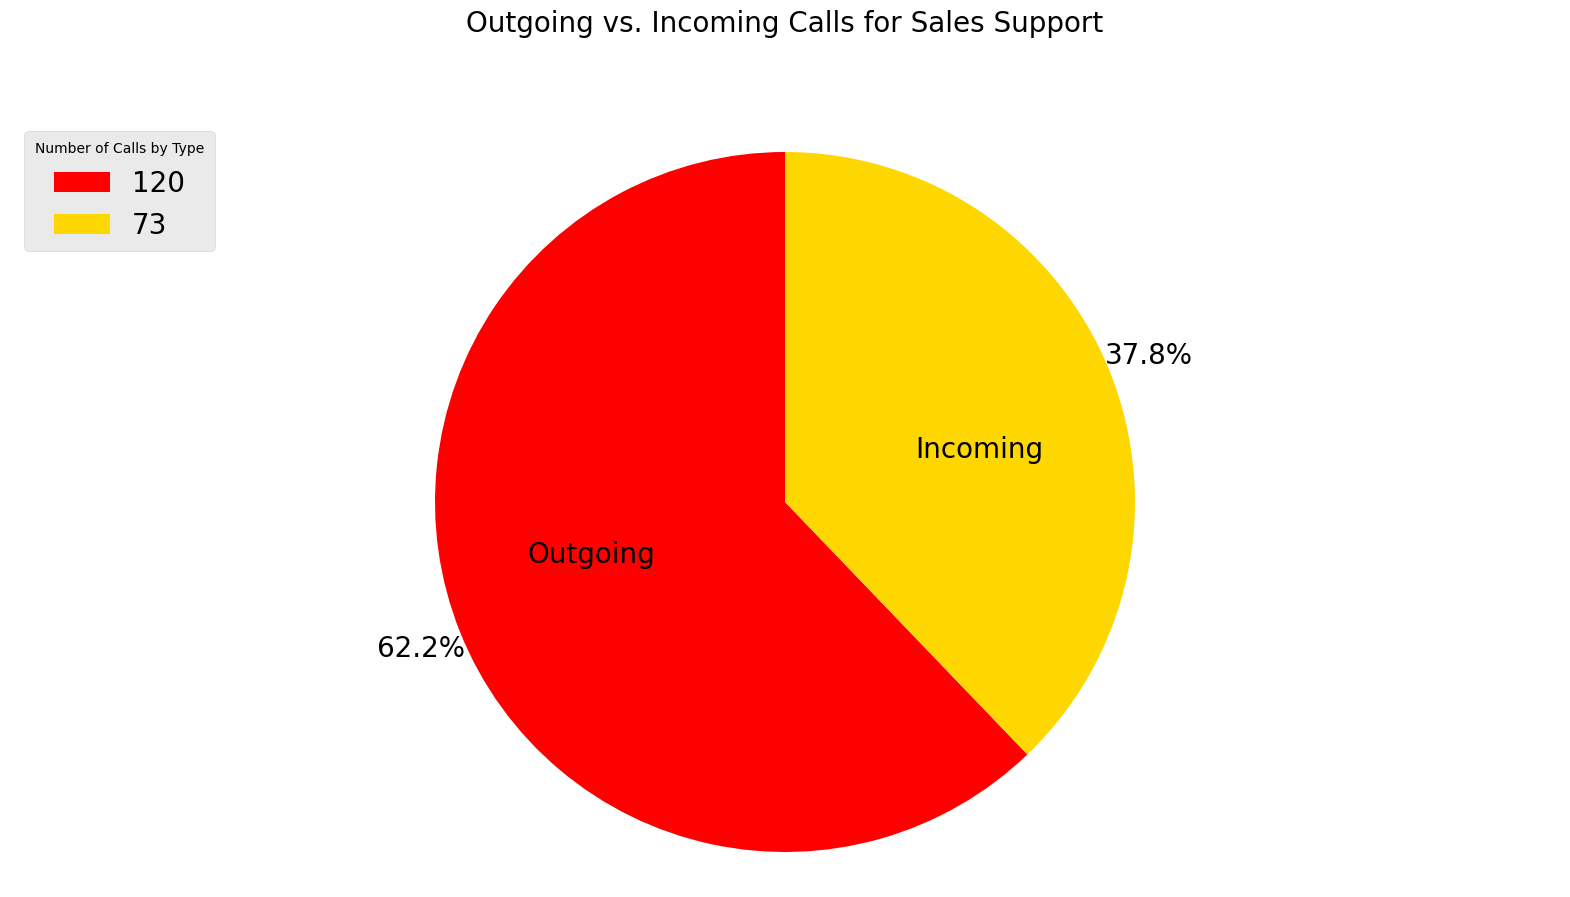

In [49]:
colors = ['red', 'gold']
labels = ["Outgoing", "Incoming"]
labels = list(labels)

plt.pie(sales_support.values(), labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12, labeldistance = 0.4, shadow = False, textprops={'fontsize': 20})
plt.title('Outgoing vs. Incoming Calls for Sales Support', color = 'black', y = 1.1, fontsize = 20)
plt.axis('equal')
plt.savefig('Sales_Support_pie.png')
# plt.legend(purpose_counts, loc = 'upper left', fontsize = 20, title = "Number of Calls by Type")
plt.legend(sales_support.values(), loc = 'upper left', fontsize = 20, title = "Number of Calls by Type")

plt.show()

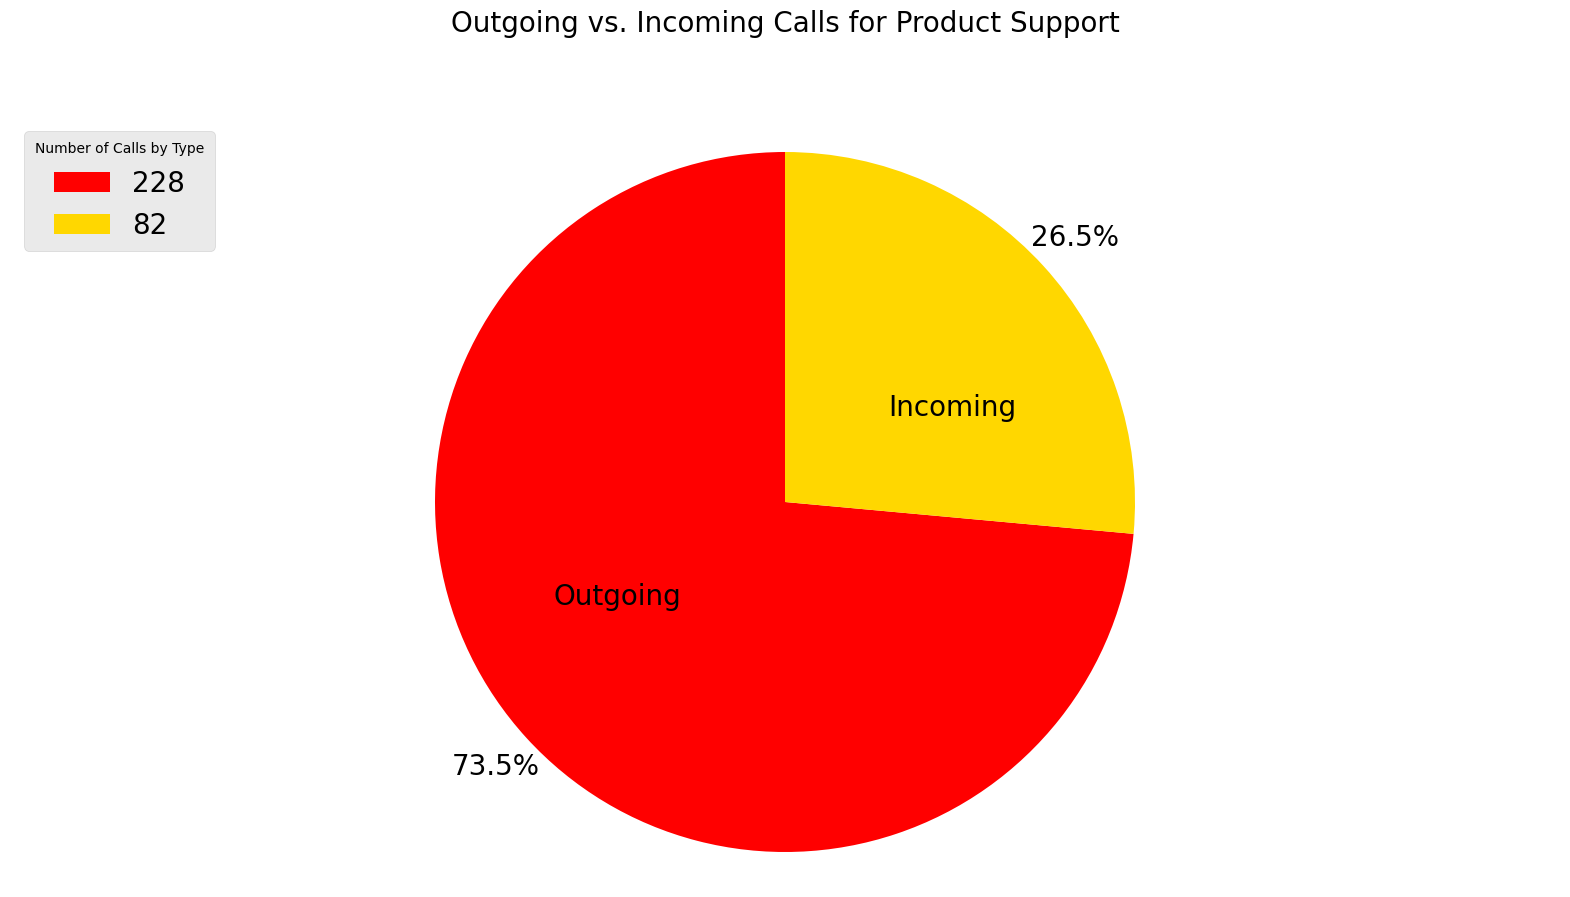

In [50]:
colors = ['red', 'gold']
labels = ["Outgoing", "Incoming"]
labels = list(labels)

plt.pie(product_support.values(), labels = labels, colors = colors, autopct = '%1.1f%%', startangle = 90, pctdistance = 1.12, labeldistance = 0.4, shadow = False, textprops={'fontsize': 20})
plt.title('Outgoing vs. Incoming Calls for Product Support', color = 'black', y = 1.1, fontsize = 20)
plt.axis('equal')
plt.savefig('Product_Support_pie.png')
# plt.legend(purpose_counts, loc = 'upper left', fontsize = 20, title = "Number of Calls by Type")
plt.legend(product_support.values(), loc = 'upper left', fontsize = 20, title = "Number of Calls by Type")

plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:

> Your Answer: The South branch is outperforming the North branch. The South branch fields more calls per representative (South: 15.55 calls per representative, North: 12.15 calls per representative), which likely contributes to their lower call abandonment rate (South: 1.29%, North: 2.88%). While the branches are somewhat comparable in their average speed of answer (South: 3.00 seconds, North: 3.04 seconds) and service level KPI for answer speed (South: 38.40% calls meeting this KPI, North: 40.74% calls meeting this KPI), callers spend less time overall waiting to speak to South branch representatives when factoring in busy minutes and not ready minutes (South: 12.02 minutes, North: 11.8 minutes).

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: The South branch would benefit from additional support. The Incoming Wait Time is similar across branches (South: 3.00 seconds, North: 3.04 seconds), as is the overall wait time when considering busy minutes and not ready minutes (South: 12.02 minutes, North: 11.8 minutes). However, the South branch field more calls per representative (South: 15.55 calls per rep, North: 12.15 calls per rep). With additional support, the South branch will be able to lower their overall wait time. 

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: I would have liked to have had information regarding the resolution to the calls. Branch success should consider whether the customer's complaint was resolved, if the representative made a sale, and or if the representative was able to provide satisfactory product support. 

> I would have also liked to have had the missing values in the Incoming Wait Time column. Both datasets were missing a considerable number of values considering this is a KPI on which the branches' success will be evaluated. 

> Other information regarding KPIs would be helpful. The company likely has additional KPIs on which it evaluates branches, and this information would be helpful when considering relative branch performance.

In [79]:
# Determine average number of calls per branch 
branch_grp = df.groupby(['Branch'])

branch_calls = branch_grp['Calls'].sum()

calls_per_rep = branch_calls/(df['Rep ID'].nunique())

calls_per_rep


Branch
North    12.15
South    15.55
Name: Calls, dtype: float64

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [51]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: